# Surgery General Residency Applications
Data from https://www.aamc.org/data/facts/eras/

In [1]:
import pandas as pd
import requests
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import re
from datetime import datetime, timedelta
import time
import seaborn as sns
from pylab import rcParams
sns.set(style='whitegrid',palette='husl')
matplotlib.rcParams['pdf.fonttype'] = 42

%matplotlib inline

# Load Data, Clean, and Add Percentage Columns

In [2]:
df=pd.read_csv('tabula-surgery-gen.csv',thousands=',',encoding='latin-1')

In [3]:
df=df.rename(columns={'Unnamed: 0':'race'})

In [5]:
df

,race,ERAS 2014,ERAS 2015,ERAS 2016,ERAS 2017,ERAS 2018,Unnamed: 6
0,American Indian or Alaska Native,44,55,37,53,54,NaN
1,Asian,1683,1688,1540,1619,1510,NaN
2,Black or African American,616,615,566,565,567,NaN
3,"Hispanic, Latino, or of Spanish\rOrigin",595,574,569,598,628,NaN
4,Native Hawaiian or Other Pacific\rIslander,8,12,12,13,19,NaN
5,White,3057,3169,2932,3095,3033,NaN
6,Other Race/Ethnicity,308,348,270,285,270,NaN
7,Unknown Race/Ethnicity,510,346,481,469,440,NaN


In [6]:
df=df.drop(columns='Unnamed: 6')

In [7]:
df.race=df.race.str.replace('\r',' ')

In [8]:
df.columns = df.columns.str.replace("ERAS", "")

In [9]:
df.columns=df.columns.str.replace(r"\.1", "_applications_per_program")

In [10]:
df.columns=df.columns.str.replace(" ",'')

In [11]:
df.race=df.race.str.replace(' or ','/')


In [12]:
df.race=df.race.str.replace(',','_')

In [13]:
df.race

0             American Indian/Alaska Native
1                                     Asian
2                    Black/African American
3       Hispanic_ Latino_/of Spanish Origin
4    Native Hawaiian/Other Pacific Islander
5                                     White
6                      Other Race/Ethnicity
7                    Unknown Race/Ethnicity
Name: race, dtype: object

In [14]:
df[df.columns[1:]]=df[df.columns[1:]].apply(pd.to_numeric)

In [15]:
#make a total row
df.loc['Total',:]= df.sum(axis=0)

In [16]:
df['pct_14']=df['2014']/(df['2014']['Total'])*100

In [17]:
df['pct_15']=df['2015']/(df['2015']['Total'])*100
df['pct_16']=df['2016']/(df['2016']['Total'])*100
df['pct_17']=df['2017']/(df['2017']['Total'])*100
df['pct_18']=df['2018']/(df['2018']['Total'])*100

In [18]:
df['race']['Total']='Total'

/Users/lilyliu-krason/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# Dataframe Views

In [19]:
#this is the dataframe I have: 
df

,race,2014,2015,2016,2017,2018,pct_14,pct_15,pct_16,pct_17,pct_18
0,American Indian/Alaska Native,44.0,55.0,37.0,53.0,54.0,0.645067,0.807992,0.577493,0.791399,0.828094
1,Asian,1683.0,1688.0,1540.0,1619.0,1510.0,24.673801,24.798002,24.036210,24.175004,23.155958
2,Black/African American,616.0,615.0,566.0,565.0,567.0,9.030934,9.034817,8.834088,8.436613,8.694985
3,Hispanic_ Latino_/of Spanish Origin,595.0,574.0,569.0,598.0,628.0,8.723061,8.432496,8.880912,8.929371,9.630425
4,Native Hawaiian/Other Pacific Islander,8.0,12.0,12.0,13.0,19.0,0.117285,0.176289,0.187295,0.194117,0.291366
5,White,3057.0,3169.0,2932.0,3095.0,3033.0,44.817475,46.555017,45.762447,46.214723,46.511271
6,Other Race/Ethnicity,308.0,348.0,270.0,285.0,270.0,4.515467,5.112384,4.214141,4.255637,4.140469
7,Unknown Race/Ethnicity,510.0,346.0,481.0,469.0,440.0,7.476910,5.083003,7.507414,7.003136,6.747431
Total,Total,6821.0,6807.0,6407.0,6697.0,6521.0,100.000000,100.000000,100.000000,100.000000,100.000000


In [20]:
df[['race','pct_14','pct_15','pct_16','pct_17','pct_18']][:-1]

,race,pct_14,pct_15,pct_16,pct_17,pct_18
0,American Indian/Alaska Native,0.645067,0.807992,0.577493,0.791399,0.828094
1,Asian,24.673801,24.798002,24.036210,24.175004,23.155958
2,Black/African American,9.030934,9.034817,8.834088,8.436613,8.694985
3,Hispanic_ Latino_/of Spanish Origin,8.723061,8.432496,8.880912,8.929371,9.630425
4,Native Hawaiian/Other Pacific Islander,0.117285,0.176289,0.187295,0.194117,0.291366
5,White,44.817475,46.555017,45.762447,46.214723,46.511271
6,Other Race/Ethnicity,4.515467,5.112384,4.214141,4.255637,4.140469
7,Unknown Race/Ethnicity,7.476910,5.083003,7.507414,7.003136,6.747431


In [21]:
# sns.set(font_scale=3) 
# df_race.iloc[0,:].values

In [22]:
#Creating second view
df_race = df[['race','pct_14','pct_15','pct_16','pct_17','pct_18']][:-1].T
df_race.columns=df_race.iloc[0,:].values
df_race=df_race.iloc[1:,:]
for c in list(df_race.columns):
    df_race[c]=df_race[c].astype(float)
df_race.index=range(2014, 2019, 1)
#adding a year column from the index
df_race['year'] = df_race.index
df_race['year']= df_race['year'].astype(int)

In [23]:
df_number= df[['race','2014','2015','2016','2017','2018']][:-1].T
df_number.columns=df_number.iloc[0,:].values
df_number=df_number.iloc[1:,:]
for c in list(df_number.columns):
    df_number[c]=df_number[c].astype(float)
df_number['year'] = df_number.index
df_number['year']= df_number['year'].astype(int)

In [24]:
df_number

,American Indian/Alaska Native,Asian,Black/African American,Hispanic_ Latino_/of Spanish Origin,Native Hawaiian/Other Pacific Islander,White,Other Race/Ethnicity,Unknown Race/Ethnicity,year
2014,44.0,1683.0,616.0,595.0,8.0,3057.0,308.0,510.0,2014
2015,55.0,1688.0,615.0,574.0,12.0,3169.0,348.0,346.0,2015
2016,37.0,1540.0,566.0,569.0,12.0,2932.0,270.0,481.0,2016
2017,53.0,1619.0,565.0,598.0,13.0,3095.0,285.0,469.0,2017
2018,54.0,1510.0,567.0,628.0,19.0,3033.0,270.0,440.0,2018


In [25]:
#putting dataframe into a csv so that we can combine with graduates later
df_race.to_csv('surgery-gen_residency_pct.csv',index=False)
df_number.to_csv('surgery-gen_residency_number.csv',index=False)

In [26]:
sns.set(font_scale=1) 

/Users/lilyliu-krason/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Second argument 'White' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  after removing the cwd from sys.path.


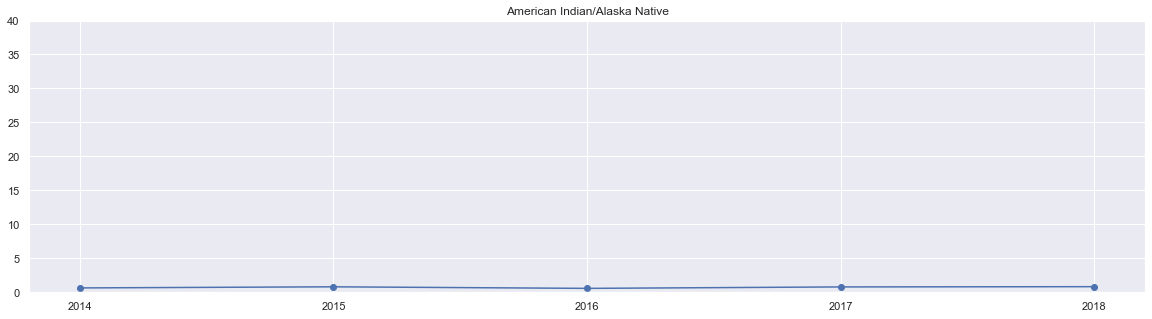

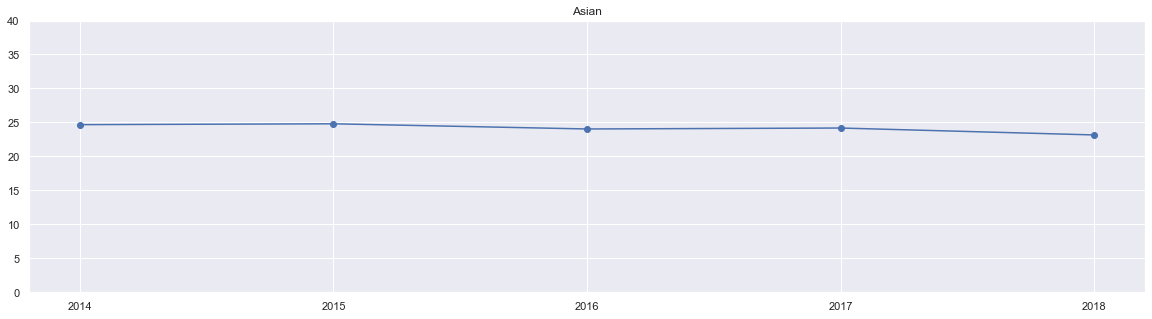

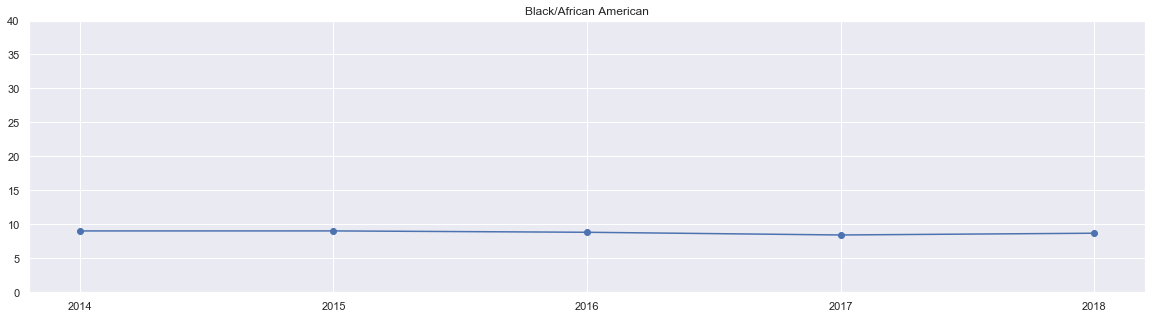

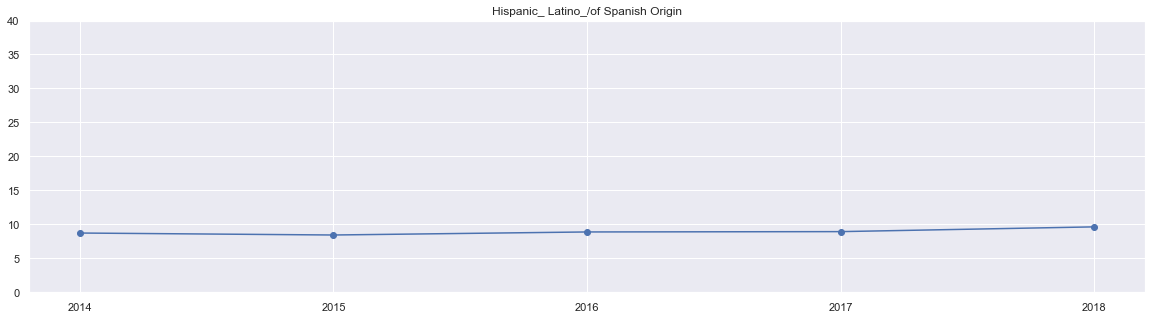

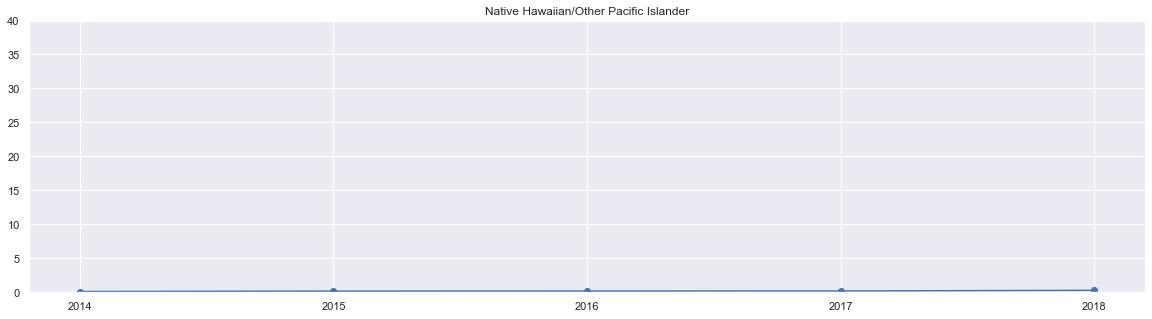

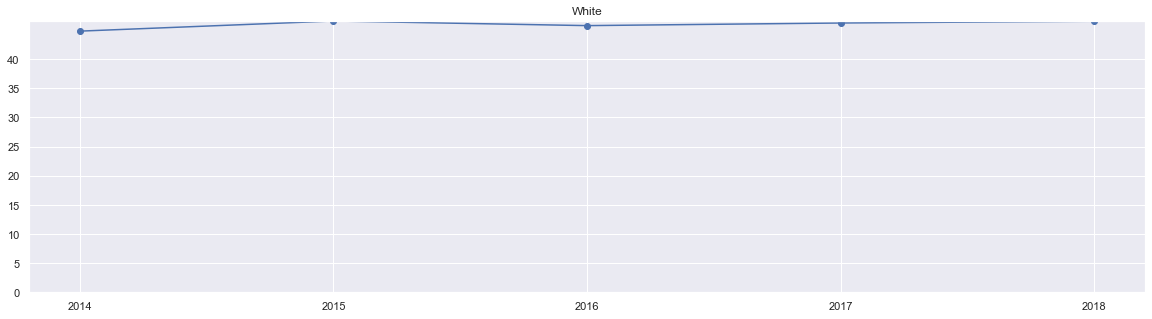

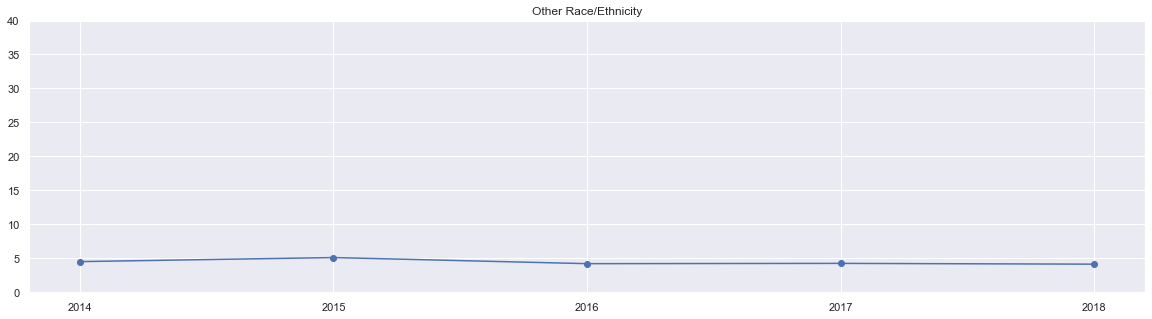

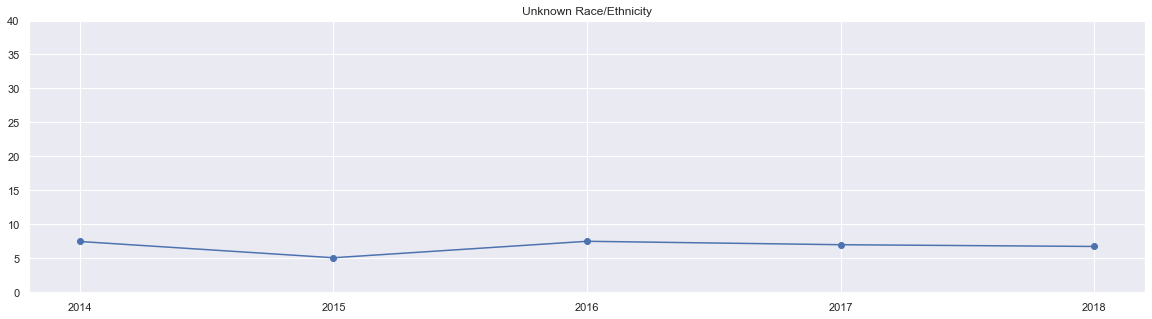

In [27]:
rcParams['figure.figsize'] = 20, 5
for c in df_race.columns[:-1]:
    plt.figure()
    plt.plot('year', c, data=df_race,marker='o')
    plt.xticks(df_race['year'].values)
    plt.yticks(range(0,42,5))
    plt.title(c)

/Users/lilyliu-krason/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Second argument 'White' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  


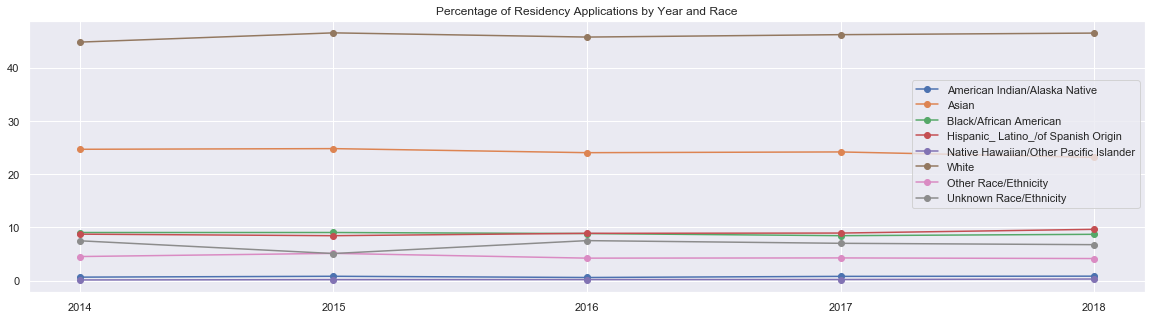

In [28]:
for c in df_race.columns[:-1]:  
    plt.plot('year', c, data=df_race,marker='o')
    plt.legend(loc='upper right', bbox_to_anchor=(0.5, 0.3, 0.5, 0.5))
    plt.xticks(df_race['year'].values)
    plt.title('Percentage of Residency Applications by Year and Race')
#save to pdf out of loop

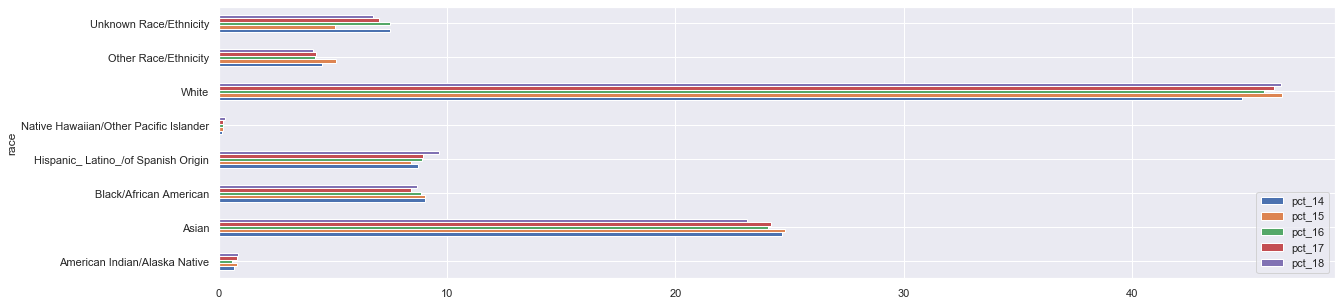

In [29]:
df[['race','pct_14','pct_15','pct_16','pct_17','pct_18']][:-1].plot(kind='barh',x='race')

In [30]:
df_num=df[['race','2014','2015','2016','2017','2018']]
df_num.to_csv('surgery-gen_num.csv',index=False)

In [31]:
df_num

,race,2014,2015,2016,2017,2018
0,American Indian/Alaska Native,44.0,55.0,37.0,53.0,54.0
1,Asian,1683.0,1688.0,1540.0,1619.0,1510.0
2,Black/African American,616.0,615.0,566.0,565.0,567.0
3,Hispanic_ Latino_/of Spanish Origin,595.0,574.0,569.0,598.0,628.0
4,Native Hawaiian/Other Pacific Islander,8.0,12.0,12.0,13.0,19.0
5,White,3057.0,3169.0,2932.0,3095.0,3033.0
6,Other Race/Ethnicity,308.0,348.0,270.0,285.0,270.0
7,Unknown Race/Ethnicity,510.0,346.0,481.0,469.0,440.0
Total,Total,6821.0,6807.0,6407.0,6697.0,6521.0
